## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Only consider the top 20k words
max_features = 20000  

# Only consider the first 500 words of each movie review
maxlen = 500 

## Build the model

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(maxlen,), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)

# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 500, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-tra

## Load the IMDB movie review sentiment data

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

25000 Training sequences
25000 Validation sequences


## Train and evaluate the model

You can use the trained model hosted on [Hugging Face Hub](https://huggingface.co/keras-io/bidirectional-lstm-imdb) and try the demo on [Hugging Face Spaces](https://huggingface.co/spaces/keras-io/bidirectional_lstm_imdb).

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))


Epoch 1/30
782/782 [==============================] - 78s 93ms/step - loss: 0.4159 - accuracy: 0.8083 - val_loss: 0.3246 - val_accuracy: 0.8717
Epoch 2/30
782/782 [==============================] - 71s 90ms/step - loss: 0.2104 - accuracy: 0.9212 - val_loss: 0.3319 - val_accuracy: 0.8670
Epoch 3/30
782/782 [==============================] - 70s 90ms/step - loss: 0.1535 - accuracy: 0.9440 - val_loss: 0.3748 - val_accuracy: 0.8590
Epoch 4/30
782/782 [==============================] - 70s 90ms/step - loss: 0.1038 - accuracy: 0.9628 - val_loss: 0.4626 - val_accuracy: 0.8408
Epoch 5/30
782/782 [==============================] - 70s 90ms/step - loss: 0.0651 - accuracy: 0.9790 - val_loss: 0.4562 - val_accuracy: 0.8578
Epoch 6/30
782/782 [==============================] - 70s 90ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.5503 - val_accuracy: 0.8608
Epoch 7/30
782/782 [==============================] - 70s 90ms/step - loss: 0.0393 - accuracy: 0.9872 - val_loss: 0.5939 - val_accuracy:

<Figure size 720x720 with 0 Axes>

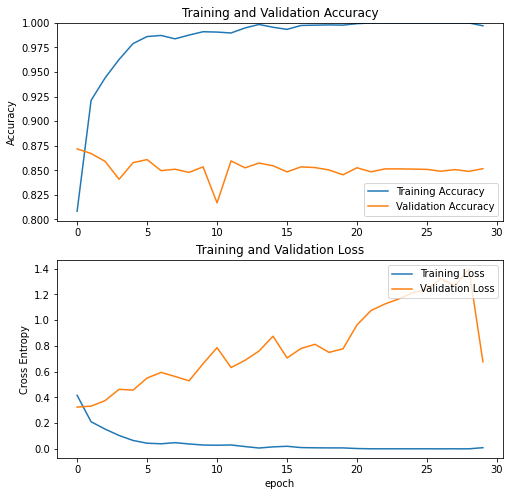

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()